<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Problem 2 - Sentiment Analysis Model  (Group)</h2><h3>AY2025 Semester</h3></th>
    </tr>
</table>

In [14]:
# Import the Required Packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout,GRU,LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model


# Set random seed for reproducibility
seed_value = 42

random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

## Step 1 – Data Loading and Processing (Group)

### 1.1 Data Loading

In [15]:
from google.colab import drive
drive.mount('/content/drive')
file_paths = {
    "spotify": '/content/drive/MyDrive/Group1/spotify.csv',
    "netflix": '/content/drive/MyDrive/Group1/netflix.csv',
    "TikTok": '/content/drive/MyDrive/Group1/TikTok.csv',
    "WhatsApp": '/content/drive/MyDrive/Group1/WhatsApp.csv',
    "instagram": '/content/drive/MyDrive/Group1/instagram.csv'
}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.1 Data Cleaning

In [16]:

# Convert the content and scores into numeric tensors
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

### 1.2 Data Processing


In [17]:
# Convert the content and scores into numeric tensors
def label_sentiment(score):
    if score <= 2:
        return 0
    elif score == 3:
        return 1
    else:
        return 2

In [18]:

max_words = 10000
maxlen = 150

processed_data = {}

for app_name, path in file_paths.items():
    print(f"\nProcessing: {app_name}")

    df = pd.read_csv(path,low_memory=False)
    df = df.rename(columns=lambda x: x.lower())

    df['clean_content'] = df['content'].astype(str).apply(clean_text)
    df['label'] = df['score'].apply(label_sentiment)

    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(df['clean_content'])
    sequences = tokenizer.texts_to_sequences(df['clean_content'])
    X = pad_sequences(sequences, maxlen=maxlen)
    y = df['label'].values

    tok_path = f"/content/drive/MyDrive/Group1/tokenizer_{app_name}.pkl"
    with open(tok_path, "wb") as f:
        pickle.dump(tokenizer, f)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    cw = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y),
        y=y_train
    )
    class_weights_dict = dict(enumerate(cw))

    processed_data[app_name] = {
        'df': df,
        'tokenizer': tokenizer,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'class_weights': class_weights_dict
    }

    print(f"{app_name}: {len(X_train)} train samples, {len(X_test)} test samples")


Processing: spotify
spotify: 80160 train samples, 20040 test samples

Processing: netflix
netflix: 80160 train samples, 20040 test samples

Processing: TikTok
TikTok: 80160 train samples, 20040 test samples

Processing: WhatsApp
WhatsApp: 80160 train samples, 20040 test samples

Processing: instagram
instagram: 80160 train samples, 20040 test samples


### 1.3 Data Sampling

placed above in the for loop

## Step 2 – Develop a Sentiment Analysis Model (Individual: One Model Per Student)

### Model #1  (Student Name: Cheong Wei En)

In [ ]:
X_train = processed_data['spotify']['X_train']
y_train = processed_data['spotify']['y_train']
X_test = processed_data['spotify']['X_test']
y_test = processed_data['spotify']['y_test']
class_weights = processed_data['spotify']['class_weights']
tokenizer = processed_data['spotify']['tokenizer']

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=16, input_length=maxlen))  # input_length is key
model.add(LSTM(32, return_sequences=True, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(LSTM(32, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.01)))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    class_weight=class_weights,
    callbacks=[early_stop]
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 275s 529ms/step - accuracy: 0.6313 - loss: 1.3059 - val_accuracy: 0.7960 - val_loss: 0.8134
Epoch 2/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 315s 526ms/step - accuracy: 0.7849 - loss: 0.8850 - val_accuracy: 0.8179 - val_loss: 0.6350
Epoch 3/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 322s 527ms/step - accuracy: 0.7904 - loss: 0.8323 - val_accuracy: 0.8108 - val_loss: 0.6134
Epoch 4/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 323s 529ms/step - accuracy: 0.7898 - loss: 0.8031 - val_accuracy: 0.8058 - val_loss: 0.6108
Epoch 5/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 321s 527ms/step - accuracy: 0.7964 - loss: 0.7795 - val_accuracy: 0.8025 - val_loss: 0.6044
Epoch 6/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 321s 525ms/step - accuracy: 0.8009 - loss: 0.7638 - val_accuracy: 0.7914 - val_loss: 0.6040
Epoch 7/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 341s 562ms/step - accuracy: 0.8014 - loss: 0.7475 - val_accuracy: 0.7991 - val_loss: 0.5923
Epoch 8/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 323s 565ms/step - accuracy: 0.7906 -

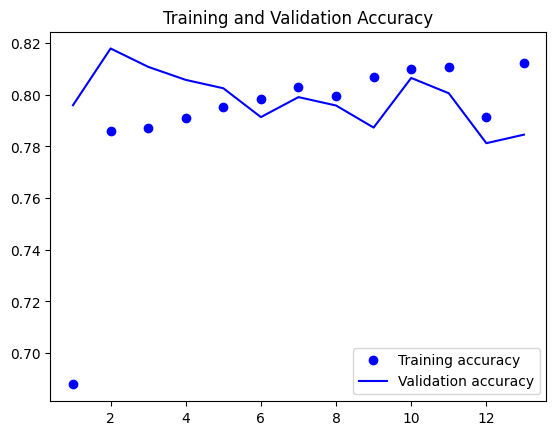

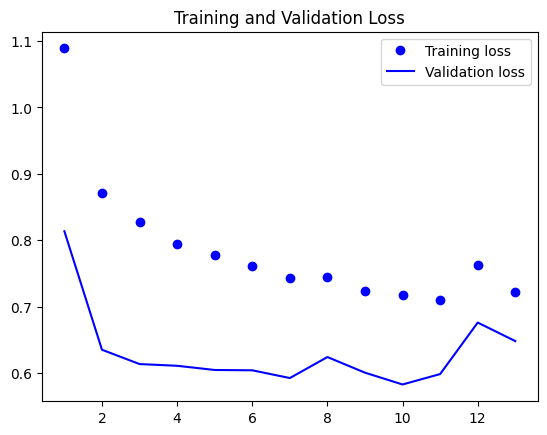

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()


In [ ]:
# Save the Model
model.save('/content/drive/MyDrive/Group1/best_model_4.h5')
model.save('text_model_1.keras')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import load_model
model1 = keras.models.load_model('/content/drive/MyDrive/Group1/best_model_4.h5')

In [ ]:
model.evaluate(processed_data['spotify']['X_test'], processed_data['spotify']['y_test'])

627/627 ━━━━━━━━━━━━━━━━━━━━ 103s 164ms/step - accuracy: 0.8162 - loss: 0.5694


[0.5734175443649292, 0.8132734298706055]

### Model #2  (Student Name: Tan Xin Yi)

In [ ]:
X_train = processed_data['netflix']['X_train']
y_train = processed_data['netflix']['y_train']
X_test = processed_data['netflix']['X_test']
y_test = processed_data['netflix']['y_test']
class_weights = processed_data['netflix']['class_weights']
tokenizer = processed_data['netflix']['tokenizer']

In [ ]:
# Build the Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import BatchNormalization, Activation


model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(input_dim=max_words, output_dim=100))
model.add(Bidirectional(LSTM(48, kernel_regularizer=l2(0.002))))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

model.summary()

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=15,
    class_weight=class_weights,
    callbacks=[early_stop]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 150, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 96)             │        57,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,419 (4.05 MB)

 Trainable params: 1,060,419 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - acc: 0.6107 - loss: 1.5579 - val_acc: 0.6849 - val_loss: 1.1561
Epoch 2/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - acc: 0.7106 - loss: 1.1449 - val_acc: 0.7824 - val_loss: 0.8274
Epoch 3/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - acc: 0.7563 - loss: 0.9473 - val_acc: 0.7798 - val_loss: 0.7394
Epoch 4/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - acc: 0.7607 - loss: 0.8746 - val_acc: 0.7821 - val_loss: 0.7059
Epoch 5/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - acc: 0.7674 - loss: 0.8355 - val_acc: 0.7803 - val_loss: 0.6982
Epoch 6/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - acc: 0.7710 - loss: 0.8047 - val_acc: 0.7765 - val_loss: 0.6909
Epoch 7/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.7759 - loss: 0.7843 - val_acc: 0.7827 - val_loss: 0.6789
Epoch 8/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - acc: 0.7819 - loss: 0.7667 - val_acc: 0.7801 - val_loss: 0.6748
Epoch 9/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 1

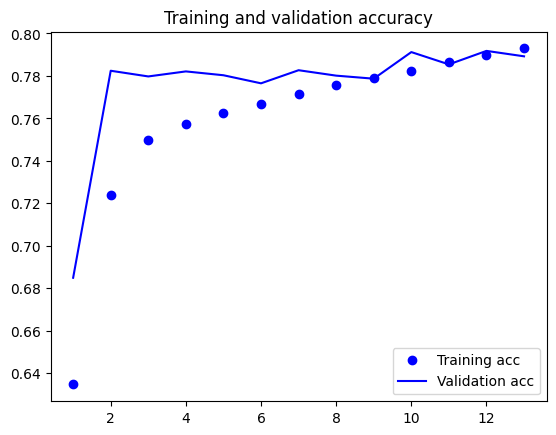

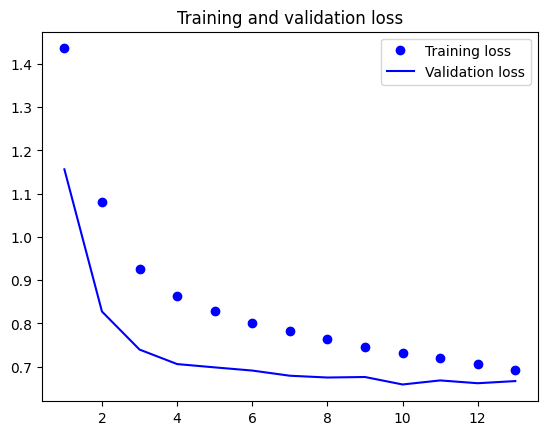

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
model.evaluate(processed_data['netflix']['X_test'], processed_data['netflix']['y_test'])

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.7935 - loss: 0.6418


[0.6586228013038635, 0.7865269184112549]

In [ ]:
# Save the Model
model.save('/content/drive/MyDrive/Group1/text_model_2.keras')

### Model #3  (Student Name: Pang Ai Jie Jennie)

---



In [19]:
X_train = processed_data['TikTok']['X_train']
y_train = processed_data['TikTok']['y_train']
X_test = processed_data['TikTok']['X_test']
y_test = processed_data['TikTok']['y_test']
class_weights = processed_data['TikTok']['class_weights']
tokenizer = processed_data['TikTok']['tokenizer']

In [20]:
# Build the Model
from tensorflow.keras import regularizers
model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(max_words, 100))
model.add(LSTM(32, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(8, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 150, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,017,315 (3.88 MB)

 Trainable params: 1,017,315 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the Model
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    class_weight=class_weights)

Epoch 1/15
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - acc: 0.4234 - loss: 1.8941 - val_acc: 0.6811 - val_loss: 1.1492
Epoch 2/15
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - acc: 0.5570 - loss: 1.1336 - val_acc: 0.6599 - val_loss: 0.9374
Epoch 3/15
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - acc: 0.6441 - loss: 1.0125 - val_acc: 0.7938 - val_loss: 0.8529
Epoch 4/15
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - acc: 0.6962 - loss: 0.9637 - val_acc: 0.8049 - val_loss: 0.8068
Epoch 5/15
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.7194 - loss: 0.9414 - val_acc: 0.8122 - val_loss: 0.7649
Epoch 6/15
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.7396 - loss: 0.9235 - val_acc: 0.8177 - val_loss: 0.7511
Epoch 7/15
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - acc: 0.7502 - loss: 0.9166 - val_acc: 0.8153 - val_loss: 0.7530
Epoch 8/15
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - acc: 0.7615 - loss: 0.9016 - val_acc: 0.8223 - val_loss: 0.7244
Epoch 9/15
1253/1253 ━━━

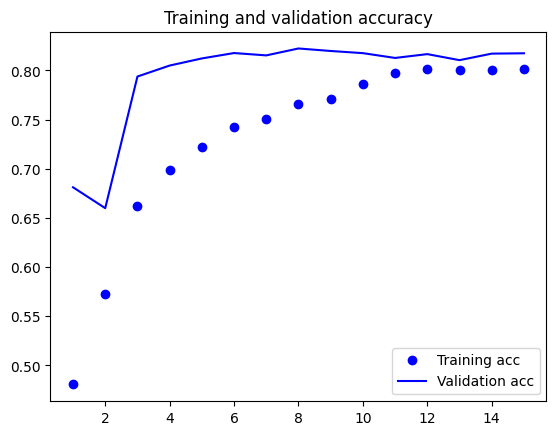

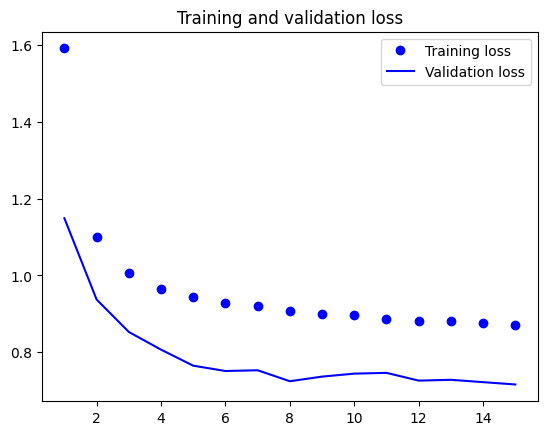

In [22]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
model.evaluate(X_test, y_test)

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.8150 - loss: 0.7214


[0.7159626483917236, 0.817415177822113]

In [24]:
# Save the Model
model.save('/content/drive/MyDrive/Group1/text_model_3.keras')

### Model #4  (Student Name: Ilamurugu Subramanian Harini)

In [ ]:
X_train = processed_data['WhatsApp']['X_train']
y_train = processed_data['WhatsApp']['y_train']
X_test = processed_data['WhatsApp']['X_test']
y_test = processed_data['WhatsApp']['y_test']
class_weights = processed_data['WhatsApp']['class_weights']
tokenizer = processed_data['WhatsApp']['tokenizer']

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, Embedding, SpatialDropout1D, BatchNormalization,GlobalMaxPooling1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential


model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=maxlen),
    SpatialDropout1D(0.3),
    LSTM(32, return_sequences=True, dropout=0.2),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Train the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
history =model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    class_weight=class_weights,
    batch_size=128,

)


Epoch 1/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6430 - loss: 1.0305 - val_accuracy: 0.7550 - val_loss: 0.8485
Epoch 2/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7708 - loss: 0.9118 - val_accuracy: 0.7501 - val_loss: 0.8157
Epoch 3/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7741 - loss: 0.8731 - val_accuracy: 0.7610 - val_loss: 0.7997
Epoch 4/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7767 - loss: 0.8459 - val_accuracy: 0.7524 - val_loss: 0.8059
Epoch 5/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7810 - loss: 0.8228 - val_accuracy: 0.7428 - val_loss: 0.8310
Epoch 6/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7884 - loss: 0.7975 - val_accuracy: 0.7449 - val_loss: 0.8273
Epoch 7/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7904 - loss: 0.7809 - val_accuracy: 0.7443 - val_loss: 0.8384
Epoch 8/15
501/501 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7955 - loss: 0.7660 - val_a

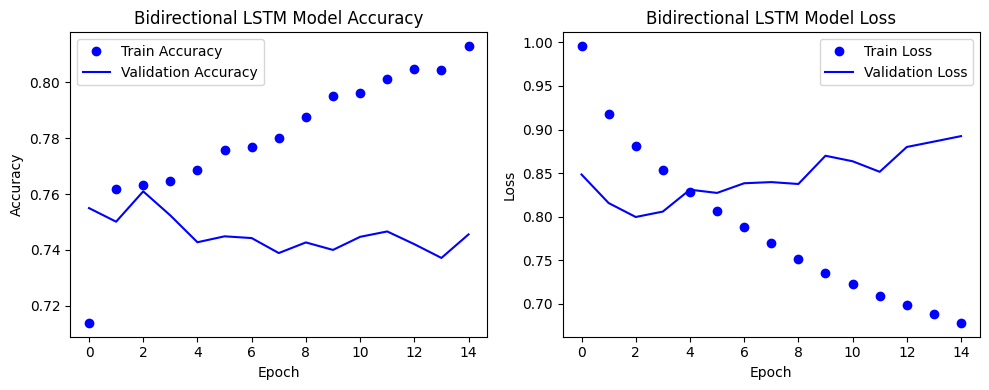

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'bo',label='Train Accuracy')
plt.plot(history.history['val_accuracy'],'b', label='Validation Accuracy')
plt.title('Bidirectional LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],'bo', label='Train Loss')
plt.plot(history.history['val_loss'], 'b',label='Validation Loss')
plt.title('Bidirectional LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
model.evaluate(processed_data['WhatsApp']['X_test'], processed_data['WhatsApp']['y_test'])

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7446 - loss: 0.8650


[0.8857096433639526, 0.7408183813095093]

In [ ]:
# Save the Model
model.save('/content/drive/MyDrive/Group1/text_model_4.keras')

### Model #5  (Student Name: Alluru Rishitha Reddy)

In [ ]:
X_train = processed_data['instagram']['X_train']
y_train = processed_data['instagram']['y_train']
X_test = processed_data['instagram']['X_test']
y_test = processed_data['instagram']['y_test']
class_weights = processed_data['instagram']['class_weights']
tokenizer = processed_data['instagram']['tokenizer']

In [ ]:
# Build the Model
from tensorflow.keras.layers import Bidirectional, LSTM, SpatialDropout1D
from tensorflow.keras import regularizers

model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=maxlen))
model.add(Bidirectional(LSTM(32, return_sequences=True, dropout=(0.1), kernel_regularizer=l2(0.002))))
model.add(LSTM(32, return_sequences=False, dropout=(0.1), kernel_regularizer=l2(0.002)))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 150, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 150, 64)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349,155 (1.33 MB)

 Trainable params: 349,155 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    class_weight=class_weights,
                    callbacks=[early_stop])

Epoch 1/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - acc: 0.7208 - loss: 1.3971 - val_acc: 0.7522 - val_loss: 1.0960
Epoch 2/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - acc: 0.7482 - loss: 1.1693 - val_acc: 0.7635 - val_loss: 0.9700
Epoch 3/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - acc: 0.7707 - loss: 1.0404 - val_acc: 0.8011 - val_loss: 0.8470
Epoch 4/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - acc: 0.8051 - loss: 0.9529 - val_acc: 0.8146 - val_loss: 0.8001
Epoch 5/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - acc: 0.8126 - loss: 0.9151 - val_acc: 0.8111 - val_loss: 0.7823
Epoch 6/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - acc: 0.8129 - loss: 0.8962 - val_acc: 0.8136 - val_loss: 0.7590
Epoch 7/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - acc: 0.8028 - loss: 0.8852 - val_acc: 0.8064 - val_loss: 0.7570
Epoch 8/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - acc: 0.8027 - loss: 0.8749 - val_acc: 0.8096 - val_loss: 0.7439
Epoch 9/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 

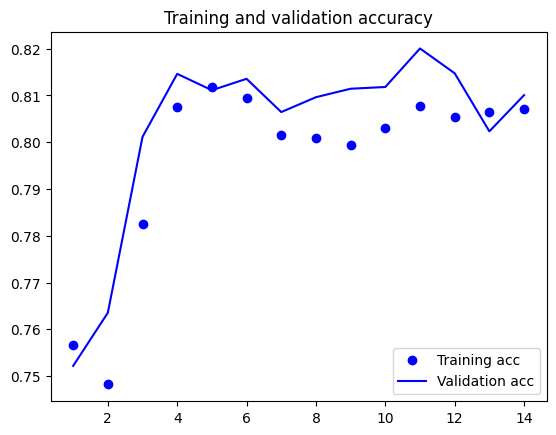

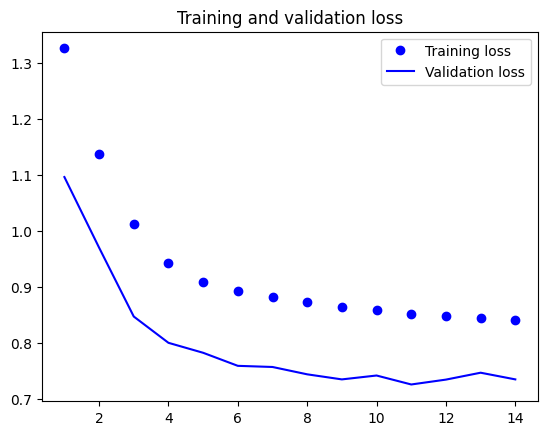

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(processed_data['instagram']['X_test'],processed_data['instagram']['y_test'])

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.8218 - loss: 0.7270


[0.7248533964157104, 0.8203094005584717]

In [ ]:
# Save the Model
model.save('/content/drive/MyDrive/Group1/text_model_5.keras')

## Step 3 – Evaluate the Model using Testing Data (Individual & Group)

In [ ]:
# Model #1 (replicate where necessary for other models)
model1 = models.load_model('/content/drive/MyDrive/Group1/best_model_4.h5')
model1.evaluate(processed_data['spotify']['X_test'], processed_data['spotify']['y_test'])
model1.evaluate(processed_data['netflix']['X_test'], processed_data['netflix']['y_test'])
model1.evaluate(processed_data['TikTok']['X_test'], processed_data['TikTok']['y_test'])
model1.evaluate(processed_data['WhatsApp']['X_test'], processed_data['WhatsApp']['y_test'])
model1.evaluate(processed_data['instagram']['X_test'], processed_data['instagram']['y_test'])

627/627 ━━━━━━━━━━━━━━━━━━━━ 103s 163ms/step - accuracy: 0.8162 - loss: 0.5694
627/627 ━━━━━━━━━━━━━━━━━━━━ 102s 163ms/step - accuracy: 0.4280 - loss: 1.5584
627/627 ━━━━━━━━━━━━━━━━━━━━ 102s 163ms/step - accuracy: 0.5436 - loss: 1.3272
627/627 ━━━━━━━━━━━━━━━━━━━━ 101s 161ms/step - accuracy: 0.6228 - loss: 1.1734
627/627 ━━━━━━━━━━━━━━━━━━━━ 102s 163ms/step - accuracy: 0.6537 - loss: 1.1106


[1.098467469215393, 0.6557884216308594]

In [ ]:
# Model #2 (replicate where necessary for other models)
model2 = models.load_model('/content/drive/MyDrive/Group1/text_model_2.keras')

model2.evaluate(processed_data['spotify']['X_test'], processed_data['spotify']['y_test'])
model2.evaluate(processed_data['netflix']['X_test'], processed_data['netflix']['y_test'])
model2.evaluate(processed_data['TikTok']['X_test'], processed_data['TikTok']['y_test'])
model2.evaluate(processed_data['WhatsApp']['X_test'], processed_data['WhatsApp']['y_test'])
model2.evaluate(processed_data['instagram']['X_test'], processed_data['instagram']['y_test'])



627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.4862 - loss: 1.6273
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.7935 - loss: 0.6418
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - acc: 0.5681 - loss: 1.3374
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.5359 - loss: 1.3454
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.5683 - loss: 1.3112


[1.3065792322158813, 0.5708084106445312]

In [25]:
# Model #3 (replicate where necessary for other models)
model3 = models.load_model('/content/drive/MyDrive/Group1/text_model_3.keras')

model3.evaluate(processed_data['spotify']['X_test'], processed_data['spotify']['y_test'])
model3.evaluate(processed_data['netflix']['X_test'], processed_data['netflix']['y_test'])
model3.evaluate(processed_data['TikTok']['X_test'], processed_data['TikTok']['y_test'])
model3.evaluate(processed_data['WhatsApp']['X_test'], processed_data['WhatsApp']['y_test'])
model3.evaluate(processed_data['instagram']['X_test'], processed_data['instagram']['y_test'])

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.4510 - loss: 1.4029
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.4989 - loss: 1.2594
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8150 - loss: 0.7214
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.6227 - loss: 1.0890
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.6355 - loss: 1.1212


[1.1120011806488037, 0.6388722658157349]

In [ ]:
# Model #4 (replicate where necessary for other models)
model4 = models.load_model('/content/drive/MyDrive/Group1/text_model_4.keras')

model4.evaluate(processed_data['spotify']['X_test'], processed_data['spotify']['y_test'])
model4.evaluate(processed_data['netflix']['X_test'], processed_data['netflix']['y_test'])
model4.evaluate(processed_data['TikTok']['X_test'], processed_data['TikTok']['y_test'])
model4.evaluate(processed_data['WhatsApp']['X_test'], processed_data['WhatsApp']['y_test'])
model4.evaluate(processed_data['instagram']['X_test'], processed_data['instagram']['y_test'])

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4483 - loss: 1.4505
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4598 - loss: 1.5684
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5505 - loss: 1.3898
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7458 - loss: 0.8643
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5397 - loss: 1.2622


[1.266956090927124, 0.5402694344520569]

In [ ]:
# Model #5 (replicate where necessary for other models)
model5 = models.load_model('/content/drive/MyDrive/Group1/text_model_5.keras')

model5.evaluate(processed_data['spotify']['X_test'], processed_data['spotify']['y_test'])
model5.evaluate(processed_data['netflix']['X_test'], processed_data['netflix']['y_test'])
model5.evaluate(processed_data['TikTok']['X_test'], processed_data['TikTok']['y_test'])
model5.evaluate(processed_data['WhatsApp']['X_test'], processed_data['WhatsApp']['y_test'])
model5.evaluate(processed_data['instagram']['X_test'], processed_data['instagram']['y_test'])

627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - acc: 0.5109 - loss: 1.2694
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.4459 - loss: 1.3157
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.4919 - loss: 1.2509
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.5668 - loss: 1.1771
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.8229 - loss: 0.7238


[0.7228738069534302, 0.8221057653427124]

In [ ]:
# Save the Best Model
model = models.load_model('/content/drive/MyDrive/Group1/best_model_4.h5')
model.save('/content/drive/MyDrive/Group1/text_model_best.keras')

## Step 4 – Use the Best Model to make prediction (Group)

In [ ]:
best_model = models.load_model('/content/drive/MyDrive/Group1/text_model_best.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 20 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Model 1 Prediction (Wei En)

In [28]:
maxlen = 150

emoticon_map = {
    0: "😞",  # negative
    1: "😐",  # neutral
    2: "😊"   # positive
}

In [ ]:
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import drive
drive.mount('/content/drive')
weienmodel = models.load_model('/content/drive/MyDrive/Group1/best_model_4.h5')
TOKENIZER_PATH = f"/content/drive/MyDrive/Group1/tokenizer_spotify.pkl"
with open(TOKENIZER_PATH, "rb") as f:
    tokenizer = pickle.load(f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Positive

In [ ]:
print(f"Testing reviews for app: spotify")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = weienmodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: spotify
Type 'exit' to quit.
Enter your review text: Works perfectly on my phone. Highly recommended!
Predicted emoticon: 😊
Probabilities: [0.01154526 0.06550331 0.92295146]
Enter your review text: Best app ever! Use it every day.
Predicted emoticon: 😊
Probabilities: [0.00946812 0.06039291 0.93013895]
Enter your review text: This app is fantastic! It works smoothly and makes my tasks so much easier
Predicted emoticon: 😊
Probabilities: [0.0177805  0.09754615 0.88467336]
Enter your review text: This app exceeded my expectations. It’s lightweight but powerful
Predicted emoticon: 😐
Probabilities: [0.32137126 0.52803934 0.1505894 ]
Enter your review text: Love this app! It’s super fast and easy to use.
Predicted emoticon: 😊
Probabilities: [0.00551699 0.04139742 0.95308566]
Enter your review text: exit


Negative

In [ ]:
print(f"Testing reviews for app: spotify")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = weienmodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")

Testing reviews for app: spotify
Type 'exit' to quit.
Enter your review text: Poor recommendation algorithm
Predicted emoticon: 😞
Probabilities: [0.81004006 0.17580605 0.01415387]
Enter your review text: Drains my battery too fast
Predicted emoticon: 😞
Probabilities: [0.7777131  0.20228736 0.01999952]
Enter your review text: Interface is messy
Predicted emoticon: 😊
Probabilities: [0.11251616 0.27801108 0.6094728 ]
Enter your review text: The worst app I’ve used in a while.
Predicted emoticon: 😞
Probabilities: [0.9030538  0.09189519 0.00505093]
Enter your review text: Takes forever to load anything.
Predicted emoticon: 😞
Probabilities: [0.5910714  0.3514259  0.05750265]
Enter your review text: exit


Neutral

In [ ]:
print(f"Testing reviews for app: spotify")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = weienmodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")

Testing reviews for app: spotify
Type 'exit' to quit.
Enter your review text: it’s okay, does what it’s supposed to do 
Predicted emoticon: 😐
Probabilities: [0.19753264 0.4215695  0.38089785]
Enter your review text: average experience , nothing special 
Predicted emoticon: 😞
Probabilities: [0.55571574 0.36870304 0.07558127]
Enter your review text: some features are useful , some are confusing 
Predicted emoticon: 😊
Probabilities: [0.0565851  0.16409631 0.7793186 ]
Enter your review text: The app functions as expected  and performs basic tasks without issues
Predicted emoticon: 😐
Probabilities: [0.20686613 0.4971734  0.2959604 ]
Enter your review text: The update installed successfully, but I don’t see any major changes
Predicted emoticon: 😞
Probabilities: [0.874644   0.11804411 0.0073119 ]
Enter your review text: exit


## Model 2 Prediction (Xin Yi)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
xymodel = models.load_model('/content/drive/MyDrive/Group1/text_model_2.keras')
TOKENIZER_PATH = f"/content/drive/MyDrive/Group1/tokenizer_netflix.pkl"
with open(TOKENIZER_PATH, "rb") as f:
    tokenizer = pickle.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Positive

In [ ]:
print(f"Testing reviews for app: Netflix")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = xymodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: Netflix
Type 'exit' to quit.
Enter your review text: Works perfectly on my phone. Highly recommended!
Predicted emoticon: 😊
Probabilities: [0.05326996 0.18475583 0.7619743 ]
Enter your review text: Best app ever! Use it every day.
Predicted emoticon: 😊
Probabilities: [0.00964682 0.05983064 0.93052256]
Enter your review text: This app is fantastic! It works smoothly and makes my tasks so much easier
Predicted emoticon: 😊
Probabilities: [0.00219178 0.03460697 0.9632012 ]
Enter your review text: This app exceeded my expectations. It’s lightweight but powerful
Predicted emoticon: 😞
Probabilities: [0.5846509  0.35241377 0.06293533]
Enter your review text: Love this app! It’s super fast and easy to use.
Predicted emoticon: 😊
Probabilities: [9.0607477e-04 1.5701089e-02 9.8339278e-01]
Enter your review text: exit


Negative

In [ ]:
print(f"Testing reviews for app: netflix")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = xymodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: netflix
Type 'exit' to quit.
Enter your review text: Poor recommendation algorithm
Predicted emoticon: 😞
Probabilities: [0.9040244  0.07685519 0.01912043]
Enter your review text: Drains my battery too fast
Predicted emoticon: 😞
Probabilities: [0.8417182  0.12975043 0.02853132]
Enter your review text: Interface is messy
Predicted emoticon: 😞
Probabilities: [0.6390997  0.20911914 0.15178114]
Enter your review text: The worst app I’ve used in a while.
Predicted emoticon: 😞
Probabilities: [0.97109914 0.02717469 0.00172618]
Enter your review text: Takes forever to load anything.
Predicted emoticon: 😞
Probabilities: [0.88740873 0.09249991 0.0200914 ]
Enter your review text: exit


Neutral

In [ ]:
print(f"Testing reviews for app: netflix")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = xymodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: netflix
Type 'exit' to quit.
Enter your review text: it’s okay, does what it’s supposed to do 
Predicted emoticon: 😐
Probabilities: [0.17515755 0.5669395  0.25790295]
Enter your review text: average experience , nothing special 
Predicted emoticon: 😞
Probabilities: [0.6584438  0.23840828 0.10314797]
Enter your review text: some features are useful , some are confusing 
Predicted emoticon: 😐
Probabilities: [0.1615109 0.5122525 0.3262366]
Enter your review text: The update installed successfully, but I don’t see any major changes
Predicted emoticon: 😞
Probabilities: [0.9277695  0.06701805 0.00521239]
Enter your review text: The app functions as expected  and performs basic tasks without issues
Predicted emoticon: 😊
Probabilities: [0.07467655 0.3677808  0.5575426 ]
Enter your review text: exit


## Model 3 Predicion (Jennie)

In [26]:
jenmodel = models.load_model('/content/drive/MyDrive/Group1/text_model_3.keras')
TOKENIZER_PATH = f"/content/drive/MyDrive/Group1/tokenizer_TikTok.pkl"
with open(TOKENIZER_PATH, "rb") as f:
    tokenizer = pickle.load(f)

Positive

In [29]:
print(f"Testing reviews for app: Tik tok")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = jenmodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: Tik tok
Type 'exit' to quit.
Enter your review text: Works perfectly on my phone. Highly recommended!
Predicted emoticon: 😊
Probabilities: [0.12672056 0.28374398 0.58953553]
Enter your review text: Best app ever! Use it every day.
Predicted emoticon: 😊
Probabilities: [0.04355837 0.19198559 0.764456  ]
Enter your review text: This app is fantastic! It works smoothly and makes my tasks so much easier
Predicted emoticon: 😊
Probabilities: [0.07055113 0.23239139 0.6970575 ]
Enter your review text: This app exceeded my expectations. It’s lightweight but powerful
Predicted emoticon: 😊
Probabilities: [0.16192645 0.31471387 0.5233597 ]
Enter your review text: Love this app! It’s super fast and easy to use.
Predicted emoticon: 😊
Probabilities: [0.01040698 0.10318358 0.8864094 ]
Enter your review text: exit


Negative

In [30]:
print(f"Testing reviews for app: Tik tok")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = jenmodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: Tik tok
Type 'exit' to quit.
Enter your review text: Poor recommendation algorithm
Predicted emoticon: 😞
Probabilities: [0.5917685  0.36778226 0.04044921]
Enter your review text: Drains my battery too fast
Predicted emoticon: 😞
Probabilities: [0.5028263  0.40244415 0.09472953]
Enter your review text: Interface is messy
Predicted emoticon: 😊
Probabilities: [0.07926381 0.24201244 0.6787238 ]
Enter your review text: The worst app I’ve used in a while
Predicted emoticon: 😞
Probabilities: [0.5694481  0.39629978 0.0342521 ]
Enter your review text: Takes forever to load anything.
Predicted emoticon: 😞
Probabilities: [0.42914543 0.4014632  0.16939138]
Enter your review text: exit


Neutral

In [31]:
print(f"Testing reviews for app: Tik tok")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = jenmodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: Tik tok
Type 'exit' to quit.
Enter your review text: it’s okay, does what it’s supposed to do
Predicted emoticon: 😐
Probabilities: [0.29892197 0.39278507 0.30829298]
Enter your review text: average experience , nothing special 
Predicted emoticon: 😊
Probabilities: [0.1300786  0.28573146 0.58418995]
Enter your review text: some features are useful , some are confusing
Predicted emoticon: 😐
Probabilities: [0.34919506 0.39853936 0.25226563]
Enter your review text: The update installed successfully, but I don’t see any major changes
Predicted emoticon: 😞
Probabilities: [0.5286368  0.41677013 0.05459306]
Enter your review text: The app functions as expected  and performs basic tasks without issues
Predicted emoticon: 😊
Probabilities: [0.24130388 0.37516615 0.38352993]
Enter your review text: exit


## Model 4 Prediction (Harini)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
harinimodel = models.load_model('/content/drive/MyDrive/Group1/text_model_4.keras')
TOKENIZER_PATH = f"/content/drive/MyDrive/Group1/tokenizer_WhatsApp.pkl"
with open(TOKENIZER_PATH, "rb") as f:
    tokenizer = pickle.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Positive

In [ ]:
print(f"Testing reviews for app: Whatsapp")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = harinimodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: Whatsapp
Type 'exit' to quit.
Enter your review text: Works perfectly on my phone. Highly recommended!
Predicted emoticon: 😊
Probabilities: [0.00571821 0.02734527 0.9669366 ]
Enter your review text: Best app ever! Use it every day.
Predicted emoticon: 😊
Probabilities: [0.06967575 0.01622567 0.9140986 ]
Enter your review text: This app is fantastic! It works smoothly and makes my tasks so much easier
Predicted emoticon: 😊
Probabilities: [0.01178831 0.06313577 0.92507595]
Enter your review text: This app exceeded my expectations. It’s lightweight but powerful
Predicted emoticon: 😊
Probabilities: [0.15530127 0.03978645 0.80491227]
Enter your review text: Love this app! It’s super fast and easy to use.
Predicted emoticon: 😊
Probabilities: [0.05145984 0.22330055 0.72523963]
Enter your review text: exit


Negative

In [ ]:
print(f"Testing reviews for app: Whatsapp")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = harinimodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: Whatsapp
Type 'exit' to quit.
Enter your review text: Poor recommendation algorithm
Predicted emoticon: 😐
Probabilities: [0.21183799 0.7815283  0.00663371]
Enter your review text: Drains my battery too fast
Predicted emoticon: 😞
Probabilities: [0.9423942  0.01027317 0.04733267]
Enter your review text: Interface is messy
Predicted emoticon: 😊
Probabilities: [0.2652458  0.33940437 0.3953499 ]
Enter your review text: The worst app I’ve used in a while.
Predicted emoticon: 😞
Probabilities: [0.82213366 0.15817204 0.01969429]
Enter your review text: Takes forever to load anything.
Predicted emoticon: 😞
Probabilities: [0.9665326  0.00516968 0.02829772]
Enter your review text: exit


Neutral

In [ ]:
print(f"Testing reviews for app: Whatsapp")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = harinimodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: Whatsapp
Type 'exit' to quit.
Enter your review text: it’s okay, does what it’s supposed to do 
Predicted emoticon: 😊
Probabilities: [0.02773378 0.36726007 0.60500616]
Enter your review text: average experience , nothing special 
Predicted emoticon: 😐
Probabilities: [0.0258419  0.9280955  0.04606267]
Enter your review text: some features are useful , some are confusing 
Predicted emoticon: 😐
Probabilities: [0.03895809 0.9078692  0.05317272]
Enter your review text: The update installed successfully, but I don’t see any major changes
Predicted emoticon: 😞
Probabilities: [9.9269241e-01 9.5377418e-06 7.2980532e-03]
Enter your review text: The app functions as expected  and performs basic tasks without issues
Predicted emoticon: 😞
Probabilities: [0.91647416 0.00245581 0.08107004]
Enter your review text: exit


## Model 5 Prediction (Rishitha)

In [ ]:
rishmodel = models.load_model('/content/drive/MyDrive/Group1/text_model_5.keras')
TOKENIZER_PATH = f"/content/drive/MyDrive/Group1/tokenizer_instagram.pkl"
with open(TOKENIZER_PATH, "rb") as f:
    tokenizer = pickle.load(f)

Positive

In [ ]:
print(f"Testing reviews for app: instagram")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = rishmodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: instagram
Type 'exit' to quit.
Enter your review text: Works perfectly on my phone. Highly recommended!
Predicted emoticon: 😊
Probabilities: [0.15446506 0.3634569  0.48207805]
Enter your review text: Best app ever! Use it every day.
Predicted emoticon: 😊
Probabilities: [0.13345955 0.32956392 0.5369765 ]
Enter your review text: This app is fantastic! It works smoothly and makes my tasks so much easier
Predicted emoticon: 😊
Probabilities: [0.09932126 0.34626815 0.5544106 ]
Enter your review text: This app exceeded my expectations. It’s lightweight but powerful
Predicted emoticon: 😊
Probabilities: [0.09086126 0.3226726  0.58646613]
Enter your review text: Love this app! It’s super fast and easy to use.
Predicted emoticon: 😊
Probabilities: [0.03666691 0.20100819 0.7623249 ]
Enter your review text: exit


Negative

In [ ]:
print(f"Testing reviews for app: instagram")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = rishmodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: instagram
Type 'exit' to quit.
Enter your review text: Poor recommendation algorithm
Predicted emoticon: 😞
Probabilities: [0.6417276  0.28800645 0.0702659 ]
Enter your review text: Drains my battery too fast
Predicted emoticon: 😞
Probabilities: [0.6266885  0.30247787 0.07083366]
Enter your review text: Interface is messy
Predicted emoticon: 😐
Probabilities: [0.3637258  0.40439177 0.23188244]
Enter your review text: The worst app I’ve used in a while.
Predicted emoticon: 😞
Probabilities: [0.67286444 0.2832725  0.04386304]
Enter your review text: Takes forever to load anything.
Predicted emoticon: 😞
Probabilities: [0.70149624 0.24529846 0.05320524]
Enter your review text: exit


Neutral

In [ ]:
print(f"Testing reviews for app: instagram")
print("Type 'exit' to quit.")
user_text = input("Enter your review text: ")
while user_text.lower() != 'exit':
    user_clean = clean_text(user_text)  # must be same cleaning as training
    seq = tokenizer.texts_to_sequences([user_clean])
    padded = pad_sequences(seq,
                           maxlen=maxlen,
                           padding='pre',
                           truncating='pre')

    probs = rishmodel.predict(padded, verbose=0)
    class_idx = probs.argmax(axis=1)[0]

    print(f"Predicted emoticon: {emoticon_map.get(class_idx, '?')}")
    print(f"Probabilities: {probs[0]}")
    user_text = input("Enter your review text: ")


Testing reviews for app: instagram
Type 'exit' to quit.
Enter your review text: it’s okay, does what it’s supposed to do 
Predicted emoticon: 😞
Probabilities: [0.43438047 0.43179888 0.13382065]
Enter your review text: average experience , nothing special 
Predicted emoticon: 😞
Probabilities: [0.46276242 0.3981639  0.13907368]
Enter your review text: some features are useful , some are confusing 
Predicted emoticon: 😊
Probabilities: [0.08031592 0.30282983 0.61685425]
Enter your review text: The update installed successfully, but I don’t see any major changes
Predicted emoticon: 😞
Probabilities: [0.6422853  0.31646064 0.04125408]
Enter your review text: The app functions as expected  and performs basic tasks without issues
Predicted emoticon: 😞
Probabilities: [0.6102149  0.33762008 0.05216499]
Enter your review text: exit
